# Project Overview

The used car market in India is one of the fastest-growing automotive segments, with millions of vehicles being bought and sold each year. However, determining the right price for a used car remains a significant challenge. Car prices vary widely depending on several factors such as brand, model, age, mileage, fuel type, transmission, ownership history, and overall market demand.

This project aims to develop a machine learning model that predicts the price of a used car based on its features. The dataset, sourced from Cardekho.com, contains detailed information about cars sold in India. By leveraging data-driven techniques, the model will provide sellers with accurate price estimates and help buyers identify competitively priced vehicles.

# Objectives

Perform data cleaning, exploration, and visualization to understand key factors affecting car prices.

Apply feature engineering to prepare the dataset for modeling.

Train and evaluate multiple machine learning algorithms to predict used car prices.

Select the best-performing model based on accuracy and generalizability.

# Benefits

Sellers: Price their vehicles more accurately, reducing negotiation time and increasing chances of selling at a fair value.

Buyers: Identify cars that are competitively priced, leading to better purchasing decisions.

Market Efficiency: Enhance transparency and trust in the Indian used car market by reducing pricing uncertainty.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("Cardekho.csv")
df

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


# EDA

# Checking for null values and handling duplicates

In [3]:
df.isnull().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [4]:
# There are no null values according to the above result

In [5]:
df.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


# Univariate Analysis

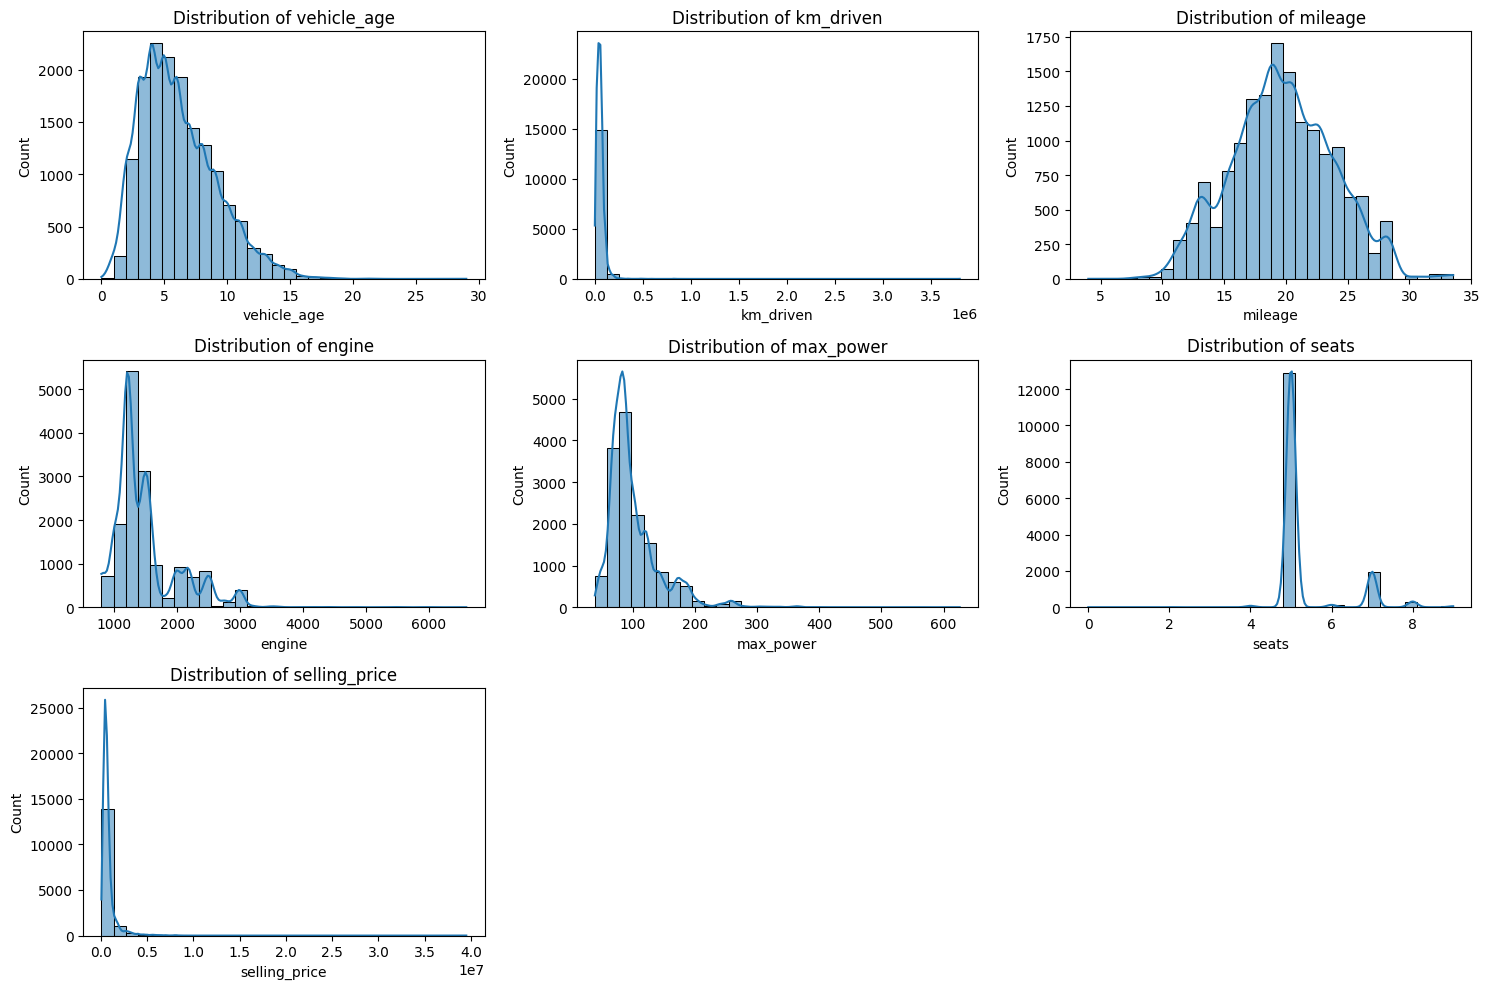

In [6]:
plt.figure(figsize = (15, 10))

num_cols = ["vehicle_age", "km_driven", "mileage", "engine", "max_power", "seats", "selling_price"]

for i in range(len(num_cols)):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[num_cols[i]], kde = True, bins = 30)
    plt.title(f"Distribution of {num_cols[i]}")

plt.tight_layout()
plt.show()

In [7]:
# In the above graphs we can see graphs like "vehicle_age", "km_driven", "engine", "max_power", "selling_price" are looking right skewed.

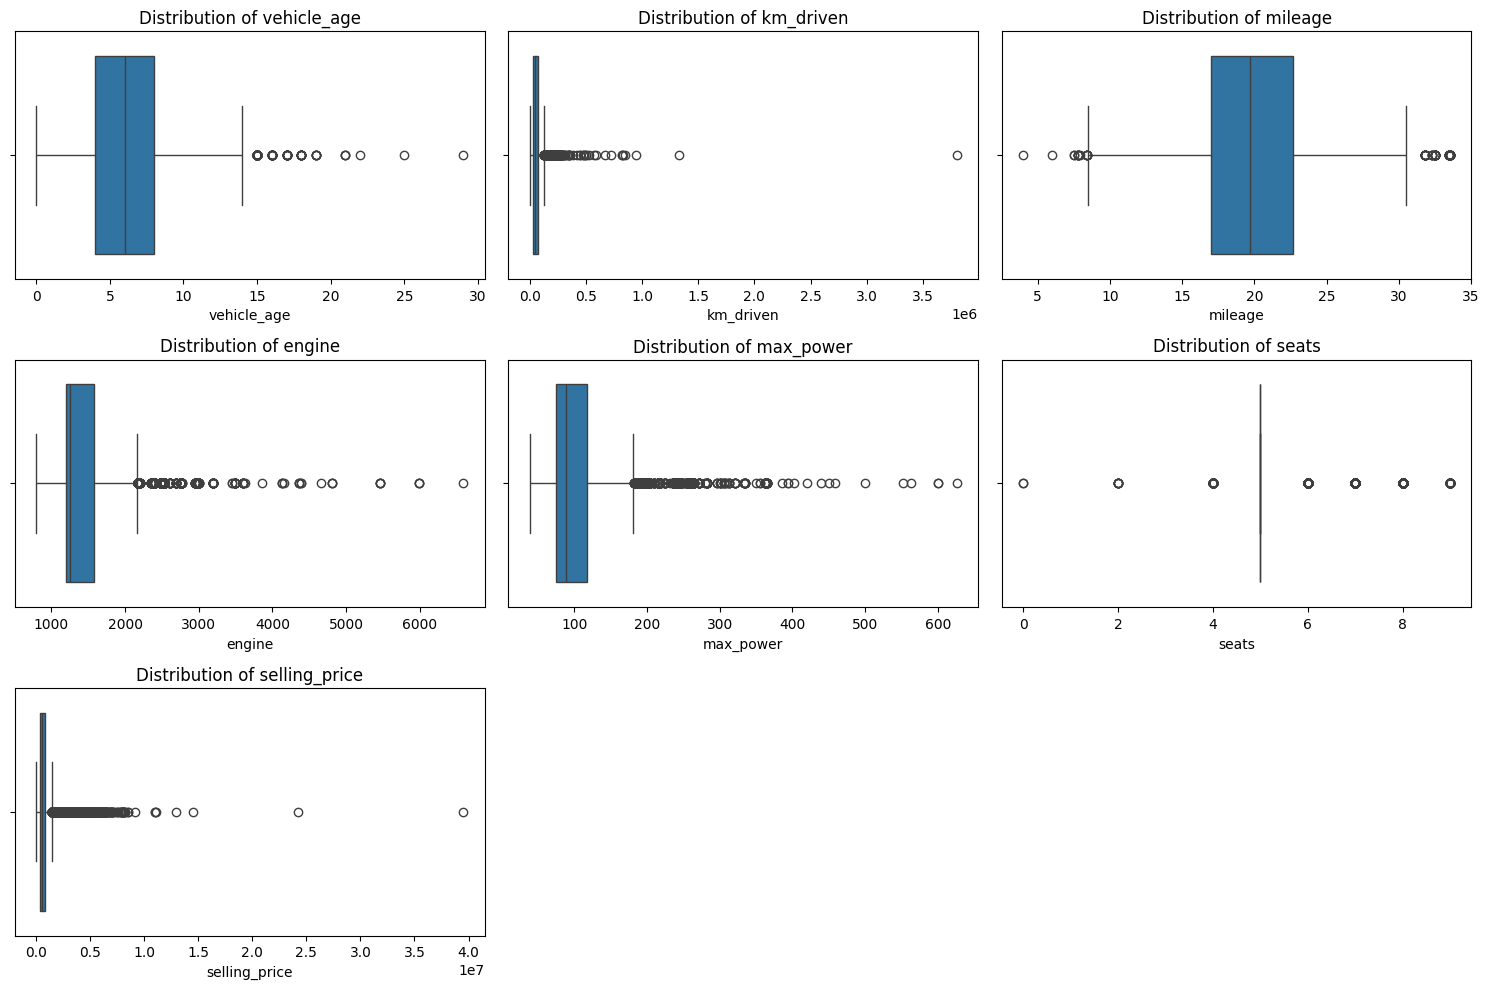

In [8]:
# Checking if we have outliers in these cols

plt.figure(figsize = (15, 10))

num_cols = ["vehicle_age", "km_driven", "mileage", "engine", "max_power", "seats", "selling_price"]

for i in range(len(num_cols)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x = df[num_cols[i]])
    plt.title(f"Distribution of {num_cols[i]}")

plt.tight_layout()
plt.show()

In [9]:
# All the cols have outliers.

# Bivariate Analysis

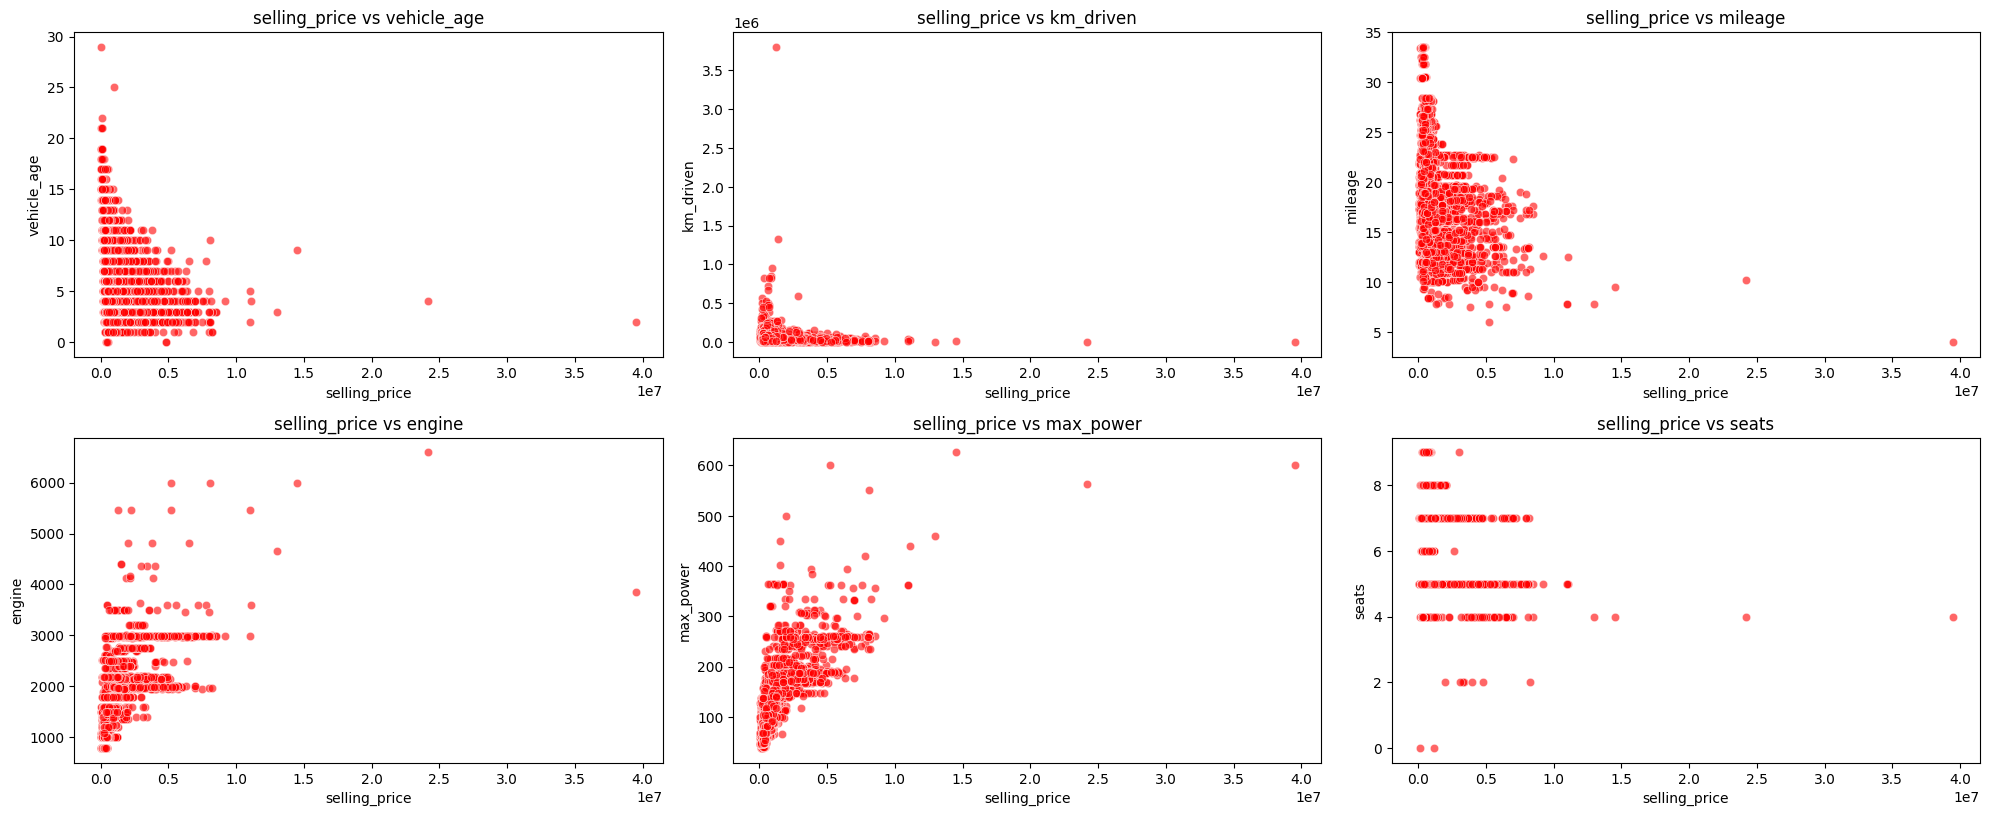

In [10]:
plt.figure(figsize=(20, 20))

num_cols = ["vehicle_age", "km_driven", "mileage", "engine", "max_power", "seats"]

for i in range(len(num_cols)):
    plt.subplot(5, 3, i + 1)  # 3 rows × 3 cols grid
    sns.scatterplot(data = df, x = 'selling_price', y = num_cols[i], color = 'r', alpha = 0.6)
    plt.title(f'selling_price vs {num_cols[i]}')

plt.tight_layout()
plt.show()

# Multivariate Analysis

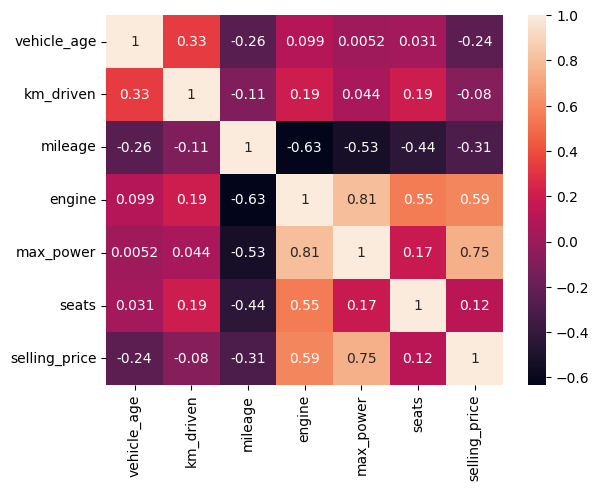

In [11]:
num_cols = ["vehicle_age", "km_driven", "mileage", "engine", "max_power", "seats", "selling_price"]

sns.heatmap(data = df[num_cols].corr(), annot = True, cmap = 'rocket')
plt.show()

In [12]:
# In the above graph we can see that 
# selling_price is negatively correlated with vehicle_age, km_driven, mileage
# selling_price is positively correlated with engine, max_power, seats

# Data Preprocessing

In [13]:
# feature engineering
model_data = df.copy()

In [14]:
df.columns

Index(['Unnamed: 0', 'car_name', 'brand', 'model', 'vehicle_age', 'km_driven',
       'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine',
       'max_power', 'seats', 'selling_price'],
      dtype='object')

In [15]:
# Dropping unnecessary columns
model_data.drop(labels = ['Unnamed: 0', 'car_name', 'brand', 'model'], axis = 1, inplace = True)

In [16]:
model_data.head()

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [17]:
# Will use one-hot encoding to create dummies of the categorical variable
model_data = pd.get_dummies(model_data, dtype = int)
model_data

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,120000,0,1,0,0,0,0,0,1,0,1
1,5,20000,18.90,1197,82.00,5,550000,0,1,0,0,0,0,0,1,0,1
2,11,60000,17.00,1197,80.00,5,215000,0,1,0,0,0,0,0,1,0,1
3,9,37000,20.92,998,67.10,5,226000,0,1,0,0,0,0,0,1,0,1
4,6,30000,22.77,1498,98.59,5,570000,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,19.81,1086,68.05,5,250000,1,0,0,0,0,0,0,1,0,1
15407,2,18000,17.50,1373,91.10,7,925000,1,0,0,0,0,0,0,1,0,1
15408,6,67000,21.14,1498,103.52,5,425000,1,0,0,0,1,0,0,0,0,1
15409,5,3800000,16.00,2179,140.00,7,1225000,1,0,0,0,1,0,0,0,0,1


In [18]:
# Feature Separation
y = model_data['selling_price']
x = model_data.drop('selling_price',axis = 1)

In [19]:
# Train / Test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [20]:
# Model building
# Linear Regression

regressor = LinearRegression().fit(x_train,y_train)
pred = regressor.predict(x_test)

In [21]:
r_square_value = r2_score(y_true = y_test,y_pred = pred)
r_square_value

0.6586796359312257

In [22]:
# Linear regression is not a good model for this data because r2 is very less

In [23]:
x_test['predicted_selling_price'] = pred

x_test['Actual_selling_price'] = y_test
x_test

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual,predicted_selling_price,Actual_selling_price
14854,4,43318,19.56,1197,81.80,5,1,0,0,0,0,0,0,1,1,0,6.912555e+05,750000
5693,8,93000,12.05,2179,120.00,8,1,0,0,0,1,0,0,0,0,1,8.455163e+05,770000
6807,5,60000,20.14,1498,88.00,5,0,1,0,0,1,0,0,0,0,1,6.225620e+05,750000
8308,3,73185,19.67,1582,126.20,5,1,0,0,0,1,0,0,0,0,1,1.320838e+06,1350000
15109,4,55000,26.21,1248,88.50,5,1,0,0,0,1,0,0,0,0,1,7.628007e+05,715000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12450,2,5000,21.70,998,67.00,5,0,1,0,0,0,0,0,1,0,1,5.183079e+05,455000
15014,8,44000,15.04,1598,103.60,5,1,0,0,0,0,0,0,1,0,1,6.295741e+05,395000
7141,7,120000,23.40,1248,74.00,5,0,1,0,0,1,0,0,0,0,1,2.595431e+05,440000
15166,5,20012,21.79,998,67.05,5,1,0,0,0,0,0,0,1,0,1,3.195299e+05,400000


In [24]:
pred = pred.astype(int)

pred

array([691255, 845516, 622561, ..., 259543, 319529, 508619], shape=(3083,))